In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
import numpy as np

'''vgg nets -> simple deep conv nets, with small receptive fields(3x3)
vgg19 has 16 convolution operations stabilised with max pooling operations, followed by 3 fully connected layers --> softmax
Pooling ----> places infinite prior to make features translation invariant(see, paper)
'''

In [ ]:
pad = 'same'
'''
Dropouts are very strong regularizations -> train ensemble of sub-networks
by removing non output units from underlying base networks

'''
ConvNet = keras.Sequential()

ConvNet.add(keras.Input(shape=(224,224,3)))

x = 0

for i in range(2):
  ConvNet.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, padding=pad, activation='relu', use_bias=False, name=f'Convolution_{x}'))
  x+=1

ConvNet.add(MaxPool2D(pool_size=(2, 2), strides=2, name='Maxpool'))

for i in range(2):
  ConvNet.add(Conv2D(filters=128, kernel_size=(3,3), strides=1, padding=pad, activation='relu', use_bias=False, name=f'Convolution_{x}'))
  x+=1

ConvNet.add(MaxPool2D(pool_size=(2, 2), strides=2, name='Maxpool_2'))

for i in range(4):
  ConvNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=1, padding=pad, activation='relu', use_bias=False, name=f'Convolution_{x}'))
  x+=1

ConvNet.add(MaxPool2D(pool_size=(2, 2), strides=2, name='Maxpool_3'))

for i in range(4):
  ConvNet.add(Conv2D(filters=512, kernel_size=(3,3), strides=1, padding=pad, activation='relu', use_bias=False, name=f'Convolution_{x}'))
  x+=1

ConvNet.add(MaxPool2D(pool_size=(2, 2), strides=2, name='Maxpool_4'))

for i in range(4):
  ConvNet.add(Conv2D(filters=512, kernel_size=(3,3), strides=1, padding=pad, use_bias=False, name=f'Convolution_{x}'))
  x+=1

ConvNet.add(MaxPool2D(pool_size=(2, 2), strides=2, name='Maxpool_5'))

for i in range(2):
  ConvNet.add(Dense(4096, name=f'FC_{x}'))
  ConvNet.add(Dropout(0.5, name=f'Dropout_{x}'))
  x+=1

ConvNet.add(Dense(1000, activation='softmax', name='FC_3'))


In [ ]:
ConvNet.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Convolution_0 (Conv2D)      (None, 224, 224, 64)      1728      
                                                                 
 Convolution_1 (Conv2D)      (None, 224, 224, 64)      36864     
                                                                 
 Maxpool (MaxPooling2D)      (None, 112, 112, 64)      0         
                                                                 
 Convolution_2 (Conv2D)      (None, 112, 112, 128)     73728     
                                                                 
 Convolution_3 (Conv2D)      (None, 112, 112, 128)     147456    
                                                                 
 Maxpool_2 (MaxPooling2D)    (None, 56, 56, 128)       0         
                                                                 
 Convolution_4 (Conv2D)      (None, 56, 56, 256)      

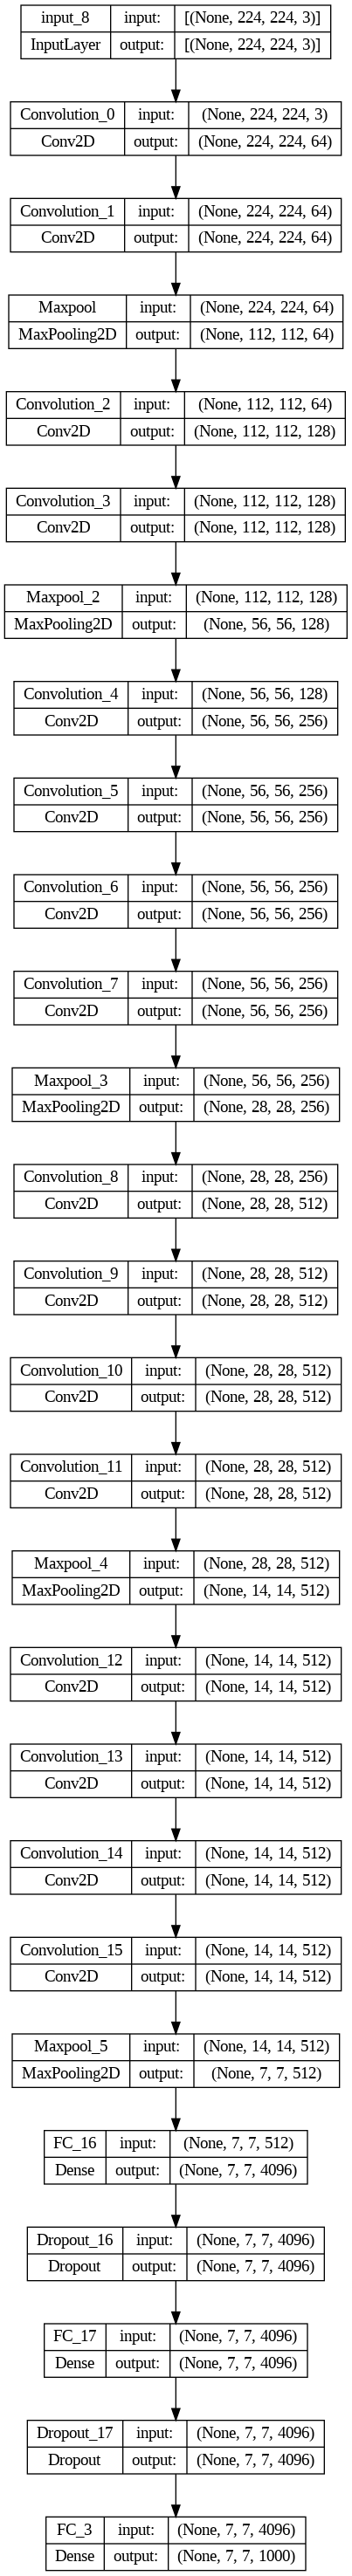

In [ ]:
keras.utils.plot_model(ConvNet, show_shapes=True)

Architecture diagram ->
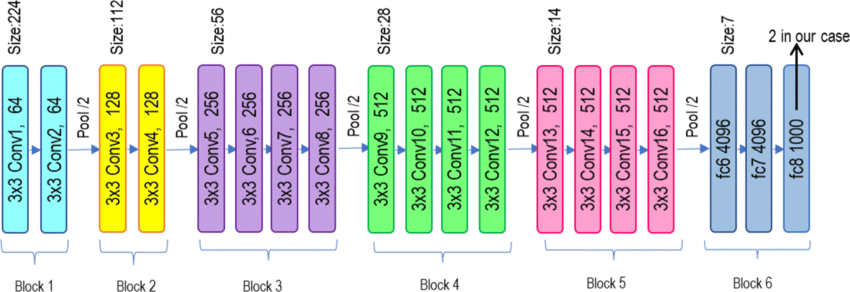